# Question 1: Linear Models with Materials Data
**1.1 Loading and examing our data**

You are provided with a dataset containing fictional materials science-related data. The data is in the HW1 folder named `AutoAM_dataset.csv` The dataset includes features such as temperature, pressure, and composition, and the target variable is a property of interest (e.g., conductivity).

a) Load the dataset and explore its structure. Heads up though! I poisoned the dataset a with things like outliers, missing cells, duplicate entries, nonsense values etc. Identify problematic data. 

I suggest using both descriptive statistics as well as some plotting to visualize the data. If you are really feeling brave you could check out and use the amazing `ydata-profiling` package (https://docs.profiling.ydata.ai/latest/). 




I initially got through this homework question and my code was pretty messy.
I got most of the way through and wanted to just start again to try to perform some of the steps in a more elegant fashion.
Unfortunately the code still ended up being messy.

One mistake I made is I put most or all of my import commands into the first code block in the notebook.
I haven't used Jupyter notebooks before so I was using C++ type best practice

After going through the other two questions I found that it is better to have redundant import commands so each code block almost functions isolated from the others due to the way the program flow works in the notebook.
I really like this format now that I'm getting used to it.




In [14]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.model_selection import train_test_split

import seaborn as sns


pd.set_option('mode.use_inf_as_na',False)

#from cycler import cycler
#plt.style.use("ggplot")
#palette = ["#00B0F6", "#F8766D", "#00BF7D", "#A3A500", "#E76BF3"]
#plt.rc('axes', prop_cycle=(cycler('color', palette)))

C:\Users\byron\AppData\Local\Temp\ipykernel_33880\1122253933.py:16: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na',False)


In [15]:
df = pd.read_csv('AutoAM_dataset.csv')
df.columns = ['primeDelay','printSpeed','xOffsetCorr','yOffsetCorr','score']

display(df)

,primeDelay,printSpeed,xOffsetCorr,yOffsetCorr,score
0,0.0,1.000000,0.000000,0.000000,0.339554
1,2.5,3.000000,0.100000,NaN,0.000000
2,5.0,5.000000,-0.100000,-0.100000,0.218576
3,0.0,0.999931,0.000006,0.000025,0.368919
4,0.0,5.070133,0.225151,1.000000,0.000000
...,...,...,...,...,...
97,0.0,1.585934,-0.337143,-0.372811,0.922120
98,0.0,1.568030,-0.335316,-0.365804,0.901296
99,0.0,3.410189,-0.182025,-0.226603,0.595148
100,0.0,1.558826,-0.349834,-0.328645,0.936549


In [26]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

b) Deal with the identified problematic data and deal with them however you see fit. Once you have done so, plot the data. The data set has 4 features and a score. Use scatter plots where you encode information as x, y, and color. Plot histograms or violin plots of some of the features.

Found a data point that appeared to ba a typo, missing the decimal point
Another in the score was negative while all other scores were positive, both were fixed assumed to be typoes
Removed duplicate records as they are also likely an error

I then tried three ways of dealing with nans:
    drop them
    mean fill
    median fill

In [17]:
#make a copy of my df
df_orig = df

#first, replace the max value in 'score' to correct what appears to be a typo
print(df['score'].max())
df = df.replace({'score':{696129:0.696129}})
print(df['score'].max())

#believe the negative score is another typo
print(df['score'].min())
df=df.replace({'score':{-0.521209:0.521209}})
print(df['score'].min())

#look for duplicate values
df = df.drop_duplicates()

#Now we will repalce all nan with the mean for each column
df_meanFill = df.apply(lambda column: column.fillna(column.mean()))
df_medianFill = df.apply(lambda column: column.fillna(column.median()))
df_dropNan = df.dropna()

display(df)

696129.0
0.936549
-0.521209
0.0


,primeDelay,printSpeed,xOffsetCorr,yOffsetCorr,score
0,0.000000,1.000000,0.000000,0.000000,0.339554
1,2.500000,3.000000,0.100000,NaN,0.000000
2,5.000000,5.000000,-0.100000,-0.100000,0.218576
3,0.000000,0.999931,0.000006,0.000025,0.368919
4,0.000000,5.070133,0.225151,1.000000,0.000000
...,...,...,...,...,...
96,0.742365,1.714610,-0.380317,-0.416497,0.829756
97,0.000000,1.585934,-0.337143,-0.372811,0.922120
98,0.000000,1.568030,-0.335316,-0.365804,0.901296
100,0.000000,1.558826,-0.349834,-0.328645,0.936549


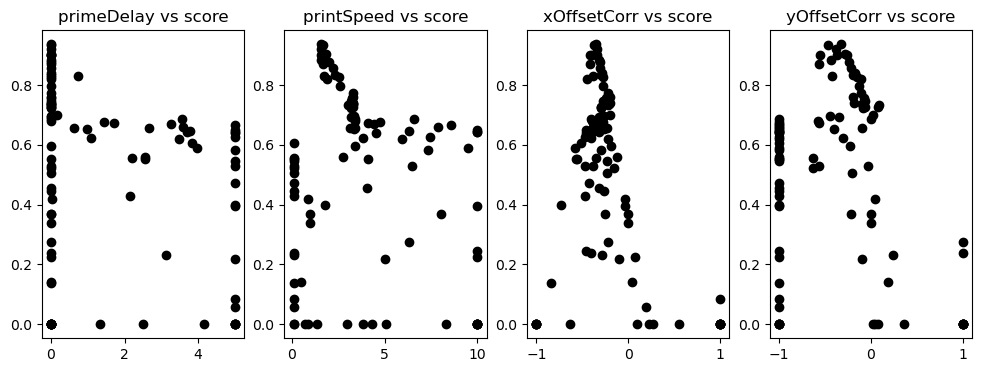

In [18]:
#your plotting code goes here

fig, ax = plt.subplots(1,4, figsize=(12,4))

vars = ['primeDelay','printSpeed','xOffsetCorr','yOffsetCorr']

for i, vars in enumerate(vars):
    ax[i].scatter(df[vars],df['score'], color='black')
    ax[i].set_title(f'{vars} vs score')
plt.show()

In [19]:
# i had some trouble with inf values at some point (can't remember what I was doing now)
# this just checks if there are any infs in the dataset
infVals = df.applymap(np.isinf)
print(infVals.any())

primeDelay     False
printSpeed     False
xOffsetCorr    False
yOffsetCorr    False
score          False
dtype: bool


C:\Users\byron\AppData\Local\Temp\ipykernel_33880\1298845578.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  infVals = df.applymap(np.isinf)


c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  

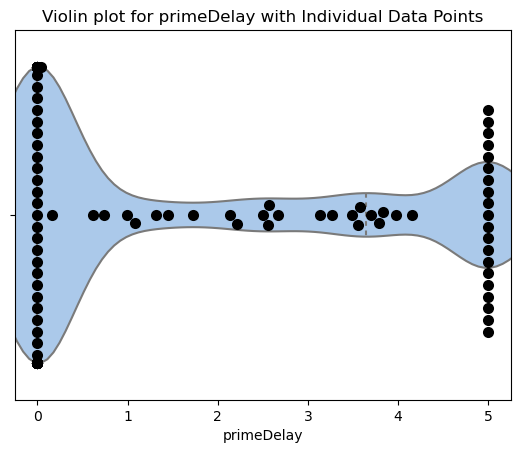

c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


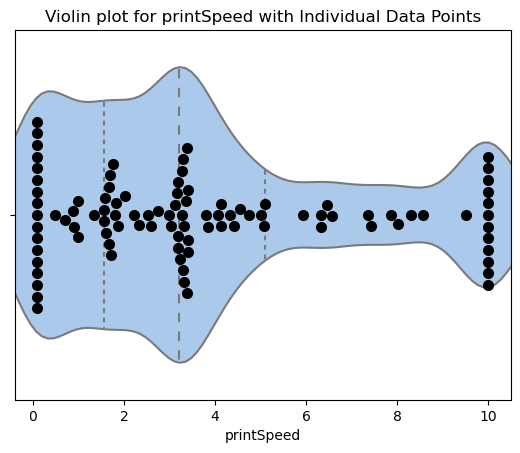

c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


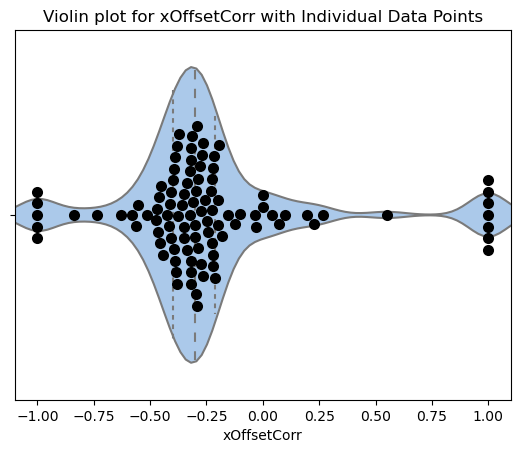

c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  w

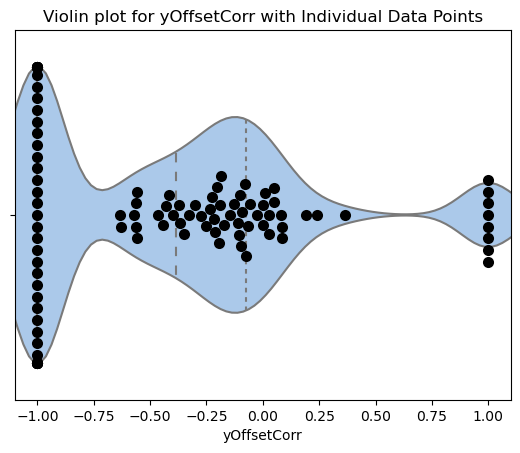

c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


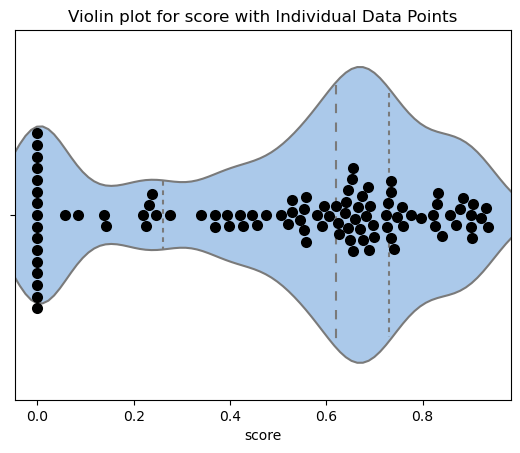

In [20]:
#generate violin plots to look for outliers

for colName in df.columns:
    # Create a violin plot with customizations
    sns.violinplot(x=df[colName], bw=0.2, inner='quartile', palette='pastel')

    # Overlay individual data points with black color
    sns.swarmplot(x=df[colName], color='black', size=8)

    plt.title(f'Violin plot for {colName} with Individual Data Points')
    plt.show()


Rows with outliers in primeDelay:
Empty DataFrame
Columns: [primeDelay, printSpeed, xOffsetCorr, yOffsetCorr, score]
Index: []


c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


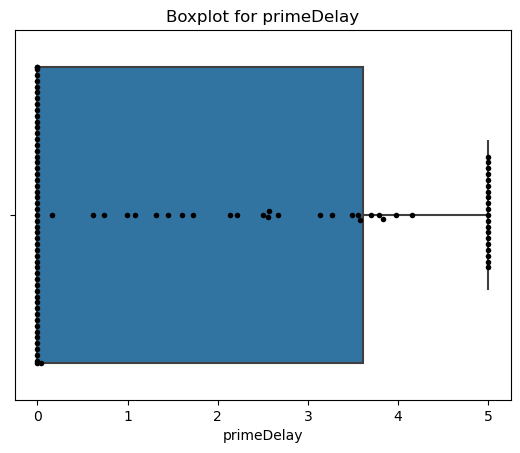

Rows with outliers in printSpeed:
Empty DataFrame
Columns: [primeDelay, printSpeed, xOffsetCorr, yOffsetCorr, score]
Index: []


c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


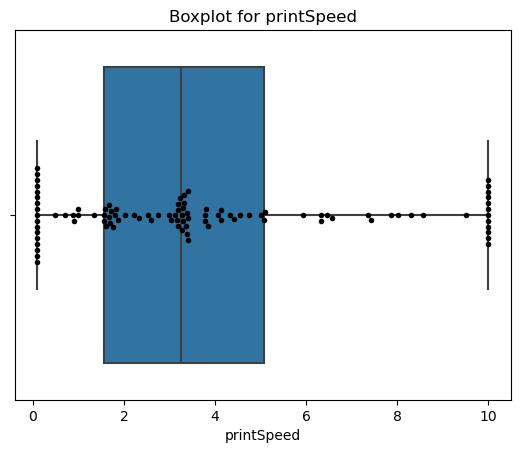

Rows with outliers in xOffsetCorr:
     primeDelay  printSpeed  xOffsetCorr  yOffsetCorr     score
1      2.500000    3.000000     0.100000    -0.399758  0.000000
4      0.000000    5.070133     0.225151     1.000000  0.000000
7      1.320466    0.876729    -1.000000     0.365729  0.000000
8      0.000000    8.309435    -1.000000     0.051005  0.000000
9      4.154110    0.700994    -1.000000     0.029317  0.000000
10     0.000000    1.350344    -1.000000     0.081764  0.000000
18     5.000000   10.000000     1.000000    -1.000000  0.000000
19     0.000000    0.100000     1.000000     1.000000  0.000000
23     5.000000    1.770116    -0.734004    -1.000000  0.397736
29     0.000000    0.100000     0.549188    -1.000000  0.000000
32     5.000000   10.000000     1.000000     1.000000  0.000000
33     5.000000   10.000000    -1.000000    -1.000000  0.000000
57     0.000000   10.000000     1.000000    -1.000000  0.000000
61     5.000000    0.100000     1.000000    -1.000000  0.085345
77   

c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


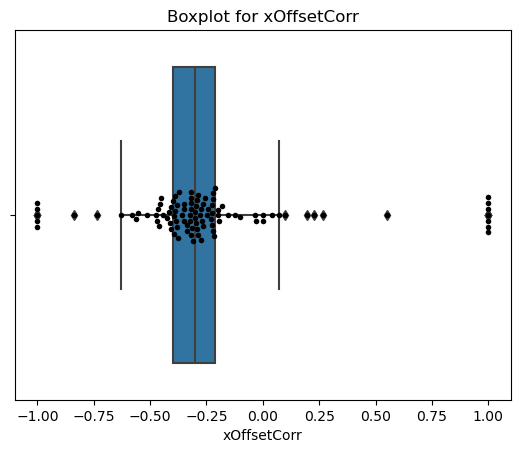

Rows with outliers in yOffsetCorr:
Empty DataFrame
Columns: [primeDelay, printSpeed, xOffsetCorr, yOffsetCorr, score]
Index: []


c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


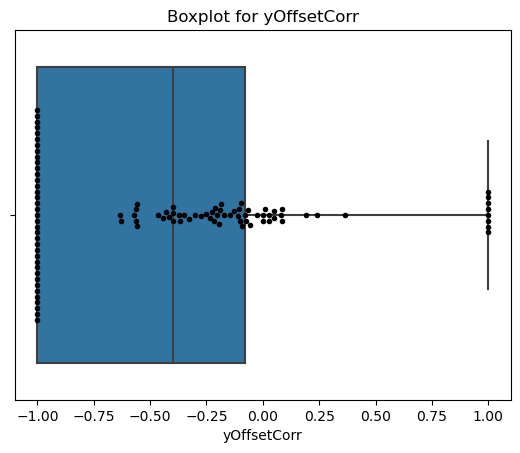

Rows with outliers in score:
Empty DataFrame
Columns: [primeDelay, printSpeed, xOffsetCorr, yOffsetCorr, score]
Index: []


c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\byron\miniconda3\envs\MI_HW1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


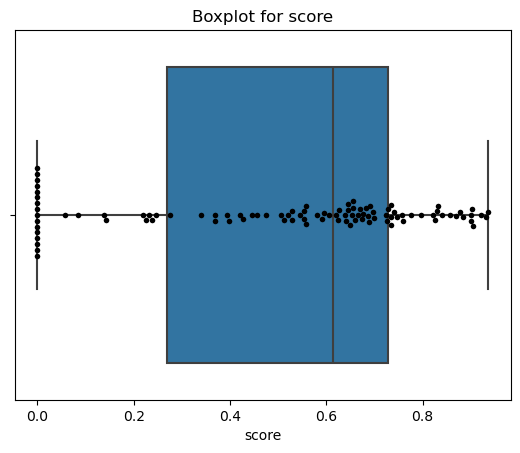

In [28]:



for colName in df.columns:
    Q1 = df[colName].quantile(0.25)
    Q3 = df[colName].quantile(0.75)
    IQR = Q3-Q1
    thresh = 1.5

    outlierMask = (df[colName] < Q1 - thresh * IQR) | (df[colName] > Q3 + thresh * IQR)

    print(f"Rows with outliers in {colName}:")
    print(df[outlierMask])

    sns.boxplot(x=df[colName])
    sns.swarmplot(x=df[colName],color='black',size=4)
    plt.title(f'Boxplot for {colName}')
    plt.show()



There are outliers in xOffsetCorr

I am unsure the best way of dealing with that other than just not using that in my model by excluding that.
There are quite a few for that parameter

b) Split the dataset into training and testing sets (80% training, 20% testing).



Different parts of this code are uncomented to check different nan value handling
meanFill did the best

I explored several ways of looking at this fit.
from fitting to data only where score was >0.6 
fitting on that data to try to predict all data 
differnt ways of splitting the data, etc


This coded ended up being pretty messy and I intended to clean it up later, but that did not happen



In [37]:
#previously several dfs were created with different methods of dealing with nan data
#df_meanFill 
#df_medianFill
#df_dropNan 
#now we can run the model on any of these methods by setting df = one of them

df = df_meanFill
#df = df_medianFill
#df = df_dropNan

#df = df[df['score'] >= 0.6]

#X = df.columns=['score'])

#X = df['primeDelay']
X = df.drop(columns=['score'])
y = df['score']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


# X_test = df_meanFill.drop(columns=['score'])
# y_test = df_meanFill['score']

# X_test = X_test[~X_test.isin(X_train)].dropna()
# y_test = y_test[~y_test.isin(y_train)].dropna()



# #what if i manually split the data
# X_train = df.drop(columns=['score'])
# y_train = df['score']

# df=df_meanFill
# X_test = df[df['score']]
# y_test = X_test['score']
# X_test = X_test.drop(columns=['score'])



print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (80, 4) (80,)
Test set shape: (20, 4) (20,)


**1.2 Linear Model Construction and Validation**

Build a linear regression model using the statsmodels package.

a) Train the linear model on the training set.

In [38]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train,X_train).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     10.66
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           6.82e-07
Time:                        22:51:52   Log-Likelihood:                 3.1713
No. Observations:                  80   AIC:                             3.657
Df Residuals:                      75   BIC:                             15.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5179      0.047     10.997      

b) Validate the model on the testing set and calculate relevant evaluation metrics.



      Actual  Predicted
84  0.832971   0.605286
53  0.673479   0.565675
71  0.735191   0.605862
45  0.655095   0.595570
44  0.644678   0.481673
39  0.641716   0.438125
22  0.590437   0.542526
81  0.797176   0.587017
10  0.000000   0.760387
0   0.339554   0.508666
18  0.000000   0.065543
30  0.669569   0.570027
74  0.741053   0.568439
33  0.000000   0.600645
91  0.902128   0.692686
4   0.000000   0.256807
77  0.057350   0.372007
78  0.138480   0.895002
12  0.444846   0.741470
31  0.638409   0.504989
(20, 2)


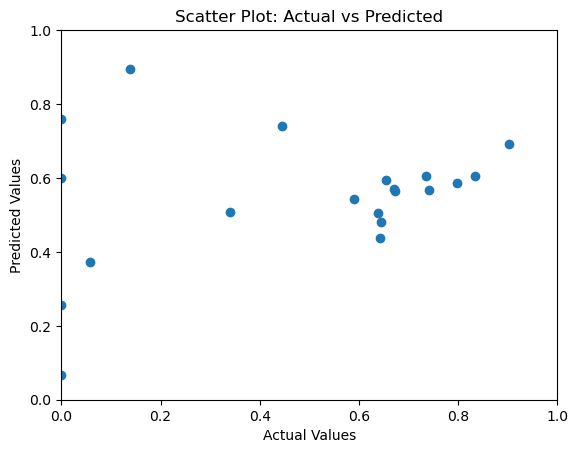

In [39]:
y_pred = model.predict(X_test)

results_df =pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
print(results_df)
print(results_df.shape)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs Predicted')
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

The model seems to fit ok in therange > 0.6, but there is a negative bias .

c) Interpret the model coefficients and assess the model's performance.



**<span style="color:teal">put your discussion here</span>**



When I filled all nan values with the mean, the model fit does very poor when the actual score is < about 0.6.   While for actual scores >= 0.6, it predicts lower than actual scores.
The RSQ was 0.362.
Also, the printSpeed p-value is high at 0.324 indicating it is not a significant feature
If I drop the printSpeed feature from the model, the RSQ decreases to 0.354 (relatively insignificant)

![Alt text](./Q1/meanFill.png) 
meanFill - with printSpeed

![Alt text](./Q1/meanFill_NoprintSpeed.png) 
meanFill - without printSpeed - slightly better with less underestimation in the range close to 0.6


Filing nan values with the median had similar results with an RSQ of 0.352, slightly worse than meanFill
Additionally the printSpeed p-value of 0.249 would indicate that it is not a significant feature

![Alt text](./Q1/medianFill.png) medianFill - with printSpeed


![Alt text](./Q1/medianFill_NoprintSpeed.png)  medianFill - without printSpeed


Simply dropping the nan values from the data set gave a better RSQ of 0.402.
With this method, the p-value for printSpeed was better at 0.106, but still an indication that it is not a significant feature.

![Alt text](./Q1/dropNan.png)  dropNan - with printSpeed
Still underestimates at >0.6, but the values are closer.

![Alt text](./Q1/dropNan_NoprintSpeed.png)  Not really much improvement dropping printSpeed when using dropNan 



![Alt text](./Q1/medianFill_0.6andHigher.png)
if the model only looks at data >= 0.6, the fit becomes much better
This fit is with all features.  The p-values for this fit indicate the only primeDelay is a significant feature

However, when the fit is changed to only look at primeDelay, the model performs very poorly.
If all score data is allowed 0 to 1, the predicted values based on primeDelay never exceed 0.6
![Alt text](./Q1/meanFill_primeDelayOnly_AllData.png)

